In [1]:
import numpy as np
import pydicom
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def calculate_image_seq_on_dicompyler(image_no):
    return 136-image_no + 1

In [3]:
def display_scan(filename_text):
    plt.imshow(pydicom.dcmread(filename_text).pixel_array, cmap=plt.cm.bone)

In [4]:
integervalue = 3
'{0:03d}'.format(integervalue)
# image_uids --> sop_instance_ids_of_136_scans
image_uids = [] # data: ids of all images in the dataset
#image_locations = [] # data : locations of all slices/images in the dataset
uid_to_filename_map = dict()
uid_to_location_map = dict()
filename = 'data/P1152/P1152_pCT_20140226_'

# making a list of UIDs of all images
# going through all the files
for i in range(1, 137):
    current_filename = filename + '{0:03d}'.format(i) + '.dcm'
    current_file = pydicom.dcmread(current_filename)
    current_uid = current_file.SOPInstanceUID
    current_location = current_file.SliceLocation
    image_uids.append(current_uid)
    uid_to_filename_map[current_uid] = current_filename
    uid_to_location_map[current_uid] = current_location # think about merging these 2 dicts
    #image_locations.append(current_file.SliceLocation)  # think about using strings vs integers
    # computational cost.

In [5]:
def find_correct_image(contoursequence):
    """
    Given an rtstruct.dicom files ROIContourSequence[9].ContourSequence[i],
    return the correct filename (using the UID)
    """
    return uid_to_filename_map[contoursequence.ContourImageSequence[0].ReferencedSOPInstanceUID]

In [6]:
# contour_file_for_all_136_scans --> cffas
cffas = pydicom.dcmread('data/P1152/P1152_RTStructure_1.dcm')

file_of_slice_with_contours = pydicom.dcmread(find_correct_image(cffas.ROIContourSequence[9].ContourSequence[6]))
pixel_array = file_of_slice_with_contours.pixel_array

contours = cffas.ROIContourSequence[9].ContourSequence[6].ContourData
x_coords_of_contours = [ float(number) for number in contours[0::3] ]
y_coords_of_contours = [ float(number) for number in contours[1::3] ]

In [7]:
pixel_spacing = file_of_slice_with_contours.PixelSpacing
x_gap = pixel_spacing[0]
y_gap = pixel_spacing[1]
image_position_starting_points = file_of_slice_with_contours.ImagePositionPatient
x_start = float(image_position_starting_points[0])
y_start = float(image_position_starting_points[1])
x_pixel_nos = (np.array(x_coords_of_contours)-x_start)/x_gap
y_pixel_nos = (np.array(y_coords_of_contours)-y_start)/y_gap

<Figure size 432x288 with 0 Axes>

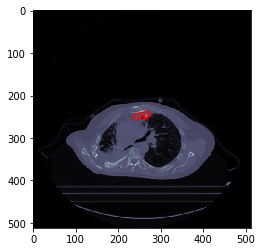

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure()
plt.imshow(pixel_array, cmap='bone')
plt.plot(x_pixel_nos, y_pixel_nos, color='r')
plt.figure()

In [9]:
temp_list = []
for a, b in zip(x_pixel_nos, y_pixel_nos):
    temp_list.append([[a, b]])
temp_array = np.array(temp_list)
temp_array_list = []
temp_array_list.append(temp_array)

In [10]:
temp_array_list[0].shape

(551, 1, 2)

In [12]:
lst_intensities = []

# For each list of contour points...
for i in range(len(temp_array_list)):
    # Create a mask image that contains the contour filled in
    cimg = np.zeros_like(pixel_array)
    cv2.drawContours(cimg, temp_array_list, i, color=255, thickness=-1)

    # Access the image pixels and create a 1D numpy array then add to list
    pts = np.where(cimg == 255)
    lst_intensities.append(pixel_array[pts[0], pts[1]])

NameError: name 'cv2' is not defined

In [ ]:
len(contours[0::3])

In [ ]:
contours

In [ ]:
import math
import matplotlib.path
import numpy as np

#x_pixel_nos = [...]
#y_pixel_nos = [...] # Data from https://gist.github.com/sdoken/173fae1f9d8673ffff5b481b3872a69d

temp_list = []
for a, b in zip(x_pixel_nos, y_pixel_nos):
   temp_list.append([a, b])

polygon = np.array(temp_list)
left = np.min(polygon, axis=0)
right = np.max(polygon, axis=0)
x = np.arange(math.ceil(left[0]), math.floor(right[0])+1)
y = np.arange(math.ceil(left[1]), math.floor(right[1])+1)
xv, yv = np.meshgrid(x, y, indexing='xy')
points = np.hstack((xv.reshape((-1,1)), yv.reshape((-1,1))))

path = matplotlib.path.Path(polygon)
mask = path.contains_points(points)
mask.shape = xv.shape

In [ ]:
type(mask)

In [ ]:
mask.shape